<a href="https://colab.research.google.com/github/eclipse1228/ML_lib/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Naive Bayes) Spam Block Model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data = pd.read_csv('spam.csv')

In [102]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.describe()

,target,text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [104]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

# 전처리 : 특수기호 제거하기
자연어 다룰 때 데이터 기준은 '단어'이다.
가장 먼저 특수기호를 제거한다.

In [12]:
import string

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
sample_string = data['text'].loc[0] # 문자열 선택
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [106]:
for i in sample_string:
  print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [16]:
for i in sample_string:
  if i not in string.punctuation:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [107]:
def remove_punc(x):
  new_string = []
  for i in x:
    if i not in string.punctuation:
      new_string.append(i)

  new_string = ''.join(new_string)
  return new_string

In [108]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [109]:
data['text'].apply(remove_punc) # apply() 로 df 전체가 아닌, text 변수에(pd Series) 적용

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [110]:
data['text'] = data['text'].apply(remove_punc)

# 전처리 : 불용어 제거하기
eliminate stopword   
(불용어 : 자연어 분석에 큰 도움이 안 되는 단어)

In [111]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# 문자가 아닌 단어로 쪼개기 작업 spilt() 띄어쓰기 기반으로 단어를 분리한다.


In [113]:
sample_string = data['text'].loc[0]
sample_string.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [114]:
for i in sample_string.split():
  if i not in stopwords.words('english'):
    print(i)


Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


Python 소문자   
lower() 소문자로 바꾸기   
upper() 대분자로 바꾸기   
capitalize() 첫 단어만 대문자로, 나머지는 소문자로

In [61]:
for i in sample_string.split():
  if i.lower() not in stopwords.words('english'):
    print(i.lower())


go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [115]:
new_string = []
for i in sample_string.split():
  if i.lower() not in stopwords.words('english'):
    new_string.append(i.lower())

new_string = ' '.join(new_string)

new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [116]:
# 함수화
def stop_words(x):
  new_string = []
  for i in x.split():
    if i.lower() not in stopwords.words('english'):
      new_string.append(i.lower())

  new_string = ' '.join(new_string)
  return new_string

stop_words(sample_string)

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [117]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

# 전처리: 목표 컬럼 형태 변경하기

---



In [59]:
# map() 딕셔너리 타입의 데이터를 사용하여 매칭되는 값을 불러오도록 사용할 수 있다.
# ex1
sample1 = pd.Series(['a','b','c'])
sample1.map({'a':'apple', 'b':'banana', 'c':'cherry'}) # a,b,c에 매칭되는 키의 값을 불러온다.

0     apple
1    banana
2    cherry
dtype: object

In [66]:
# ex2
sample2 = pd.Series(['a','b','c'])  # apply() 처럼 다른 함수를 적용시키는데에 사용할 수도 있다.
def add_i(x):
  return x+'i'

sample2.map(add_i)

0    ai
1    bi
2    ci
dtype: object

In [118]:
data

,target,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5569,spam,2nd time tried 2 contact u u £750 pound prize ...
5570,ham,ü b going esplanade fr home
5571,ham,pity mood soany suggestions
5572,ham,guy bitching acted like id interested buying s...


In [119]:
data['target'] = data['target'].map({'spam':1 , 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

# 전처리: 카운트 기반으로 벡터화 하기
즉 특정 단어가 몇개 나왔는지를 'text' 마다 확인하기 위해 벡터화 진행한다.   
카운트 기반 벡터화(CounterVectorize) = 문자를 아래와 같은 형태로 변환시키는 방법

In [120]:
x = data['text']
y = data['target']

In [126]:
data

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5569,1,2nd time tried 2 contact u u £750 pound prize ...
5570,0,ü b going esplanade fr home
5571,0,pity mood soany suggestions
5572,0,guy bitching acted like id interested buying s...


In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_
# vocalbulary_ 는 객체에 들어있는 모든 단어에 대한 인덱스를 볼 수있다. (여기서 인덱스는 큰 의미없는 id같은 역할임)

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [124]:
x= cv.transform(x)
print(x)

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [85]:
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
# jupyernotebook에서는 1셀에 여러줄 출력하려면 print() 사용해야한다.


3791
4687


# 모델링 및 예측/평가하기

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 100)

In [130]:
from sklearn.naive_bayes import MultinomialNB
# 다항 분포 (Multinomail) , 정규 분포(Gaussian) , 베르누이 분포(Bernoulli)   셋 중에서 가장 좋은 모델을 골라 사용한다.

In [129]:
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [131]:
# confusion_matrix(실제값,예측값) : 실제값과 예측값을 비교하여 매트릭스 형태로 표현하는 모듈이다.

In [136]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [137]:
accuracy_score(y_test,pred)

0.9856502242152466

In [140]:
print(confusion_matrix(y_test,pred)) #
#0
#1
# 실제값 / 예측값 ) 행

[[965  12]
 [  4 134]]


<Axes: >

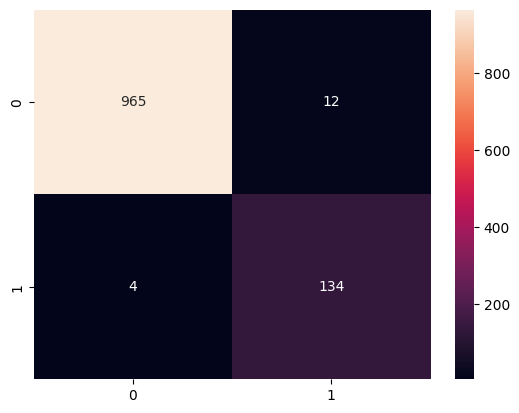

In [143]:
sns.heatmap(confusion_matrix(y_test, pred), annot = True , fmt = '.0f') # 혼동 행렬 히트맵